In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [5]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [6]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [9]:
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

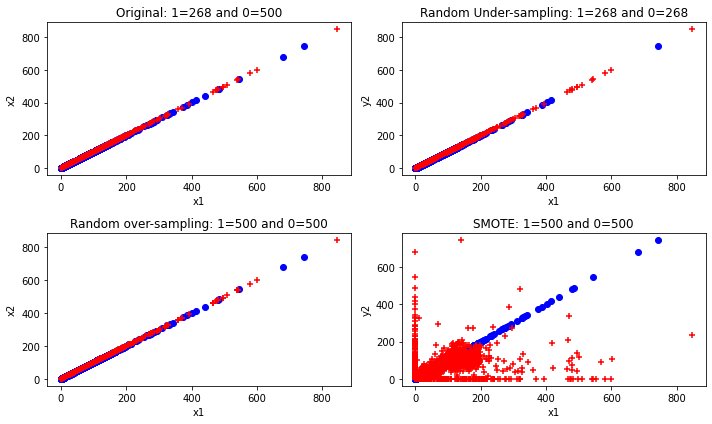

In [18]:
# Original vs resampled subplots
plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.scatter(X[y==0], X[y==0], marker='o', color='blue')
plt.scatter(X[y==1], X[y==1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original: 1=%s and 0=%s' %(y.tolist().count(1), y.tolist().count(0)))

plt.subplot(2,2,2)
plt.scatter(X_rus[y_rus==0], X_rus[y_rus==0], marker='o', color='blue')
plt.scatter(X_rus[y_rus==1], X_rus[y_rus==1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Random Under-sampling: 1=%s and 0=%s' %(y_rus.tolist().count(1),y_rus.tolist().count(0)))

plt.subplot(2,2,3)
plt.scatter(X_ros[y_ros==0], X_ros[y_ros==0], marker='o', color='blue')
plt.scatter(X_ros[y_ros==1], X_ros[y_ros==1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random over-sampling: 1=%s and 0=%s' %(y_ros.tolist().count(1), y_ros.tolist().count(0)))

plt.subplot(2,2,4)
plt.scatter(X_SMOTE[y_SMOTE==0], X_SMOTE[y_SMOTE==0], marker='o', color='blue')
plt.scatter(X_SMOTE[y_SMOTE==1], X_SMOTE[y_SMOTE==0], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('SMOTE: 1=%s and 0=%s' %(y_SMOTE.tolist().count(1), y_SMOTE.tolist().count(0)))

plt.tight_layout()
plt.show()

In [21]:
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.2)
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, test_size=0.2)
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.27)

In [23]:
# build a decision tree classifier
clf = DecisionTreeClassifier()
clf_rus = clf.fit(X_rus_train, y_rus_train)
clf_ros = clf.fit(X_ros_train, y_ros_train)
clf_smote = clf.fit(X_SMOTE_train, y_SMOTE_train)

In [30]:
print("rus - Train AUC: ", roc_auc_score(y_rus_train, clf.predict(X_rus_train)))
print("rus - Test AUC: ", roc_auc_score(y_rus_test, clf.predict(X_rus_test)))

rus - Train AUC:  0.9324105659057115
rus - Test AUC:  0.8755259467040672


In [31]:
print("ros - Train AUC: ", roc_auc_score(y_ros_train, clf.predict(X_ros_train)))
print("ros - Test AUC: ", roc_auc_score(y_ros_test, clf.predict(X_ros_test)))

ros - Train AUC:  0.9250057812861331
ros - Test AUC:  0.9698969896989699


In [32]:
print("SMOTE - Train AUC: ", roc_auc_score(y_SMOTE_train, clf.predict(X_SMOTE_train)))
print("SMOTE - Test AUC: ", roc_auc_score(y_SMOTE_test, clf.predict(X_SMOTE_test)))

SMOTE - Train AUC:  1.0
SMOTE - Test AUC:  0.7845570871547036
